# Handwritten Digit Recognition Project 🚀

Welcome to our exciting journey into the world of Deep Learning! In this project, you'll dive into the fascinating realm of handwritten digit recognition using PyTorch, one of the most popular machine learning libraries. 🧠💻

## Project Overview 📝

Your mission, should you choose to accept it, involves building and optimizing a PyTorch model to recognize handwritten digits from the MNIST dataset. This dataset is like the 'Hello World' of machine learning, perfect for beginners and yet intriguing for experienced coders. 🌟

## Learning Objectives 🎯

- **Understanding PyTorch**: Get hands-on experience with PyTorch, understanding its basic operations and how to build models with it.
- **Model Optimization**: Explore various training optimization techniques such as adding dropout layers, implementing regularizers, and utilizing early stopping to enhance model performance.
- **Experimentation**: Test different hyperparameters and observe how they impact your model's learning process and accuracy.

## Project Structure 🗂️

- **Data Preprocessing**: Learn how to prepare your data for optimal model training.
- **Model Building**: Design a neural network architecture suitable for digit recognition.
- **Training and Testing**: Implement the training loop, and test your model's performance.
- **Optimization Techniques**: Apply different optimization strategies to improve your model.

## TODOs 📌

Throughout this notebook, you'll find `TODO` sections. These are areas where you'll need to apply what you've learned and write your own code. Don't worry, though; guidance and hints are provided to help you on your journey!

So, are you ready to embark on this adventure in machine learning? Let's get started! 🚀👩‍💻👨‍💻

---

Remember, the goal of this project is not just to build a model but to experiment and learn. Every challenge you encounter is an opportunity to grow. Let's do this! 💪


## Loading the MNIST Dataset 📚

Before diving into the model building, the first crucial step is to load our dataset. In this section, you'll learn how to load and visualize the MNIST dataset, which is a collection of 70,000 grayscale images of handwritten digits (0 through 9). This dataset is widely used for training and testing in the field of machine learning. 🤖📈



In [2]:
# Import necessary libraries
import torch # Deep learning
from torchvision import datasets, transforms # manages datasets and applies data transformations
from torch.utils.data import DataLoader #

# TODO: Define a transform to normalize the data
transform = transforms.Compose([
    # TODO: Add necessary transformations
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# TODO: Load the MNIST dataset
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# TODO: Create data loaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)





In [3]:
# TODO: Figure out how many images are in the train_set and test_set.

# Determine the number of images in both datasets
num_train_images = len(train_set)
num_test_images = len(test_set)

print(f"Number of images in the training set: {num_train_images}")
print(f"Number of images in the test set: {num_test_images}")


Number of images in the training set: 60000
Number of images in the test set: 10000


In [4]:
len(train_loader)*64 == num_train_images

False

In [5]:
len(train_loader)*64

60032

## Building the Neural Network Model 🛠️

Now that our dataset is ready, it's time to build the neural network model that will learn to recognize handwritten digits. In this section, you will define the architecture of your neural network.

### Key Concepts:
- **Layers**: Neural networks are composed of layers. Each layer has a specific role, like convolutional layers for feature extraction or fully connected (dense) layers for decision making.
- **Activation Functions**: These functions introduce non-linear properties to the network, allowing it to learn more complex patterns.

In [7]:
import torch.nn as nn
import torch.nn.functional as F

# Define a simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128) # Input layer
        self.fc2 = nn.Linear(128, 10)    # Hidden layer

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = F.relu(self.fc1(x)) # Activation function
        x = self.fc2(x)         # No activation function
        return x

# Create an instance of the network
model = SimpleNet()
print(model)


SimpleNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
# TODO: Define the neural network class
class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        # TODO: Define layers of the neural network
        self.fc1 = nn.Linear(28*28, 1024)
        self.fc2 = nn.Linear(1024, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

# Create an instance of the network
model = ComplexNet()
print(model)

ComplexNet(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


## Training the Neural Network Model 🏋️‍♀️🏋️‍♂️

With our neural network model defined, the next exciting step is to train it. This process involves feeding the training data to the model and adjusting the model parameters (weights and biases) based on the computed loss and the chosen optimization algorithm.

### Key Concepts:
- **Loss Function**: Measures how well the model performs. A common choice for classification tasks is Cross-Entropy Loss.
- **Optimizer**: Helps in updating the model parameters based on the computed gradients. We'll be using Stochastic Gradient Descent (SGD) in this example.
- **Epochs**: One epoch means the model has seen the entire dataset once. Training for multiple epochs means going through the dataset multiple times.



In [8]:
from torch.optim import SGD

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01)

# Set the number of epochs for training
num_epochs = 50

# Lists to keep track of losses
hist_training_loss = []
hist_test_loss = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()       # Clear gradients from the previous step
        outputs = model(images)     #compute predicted outputs
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()             # compute gradient of the loss
        optimizer.step()

        running_loss += loss.item() # Update running training loss

    # Print average training loss per epoch
    avg_train_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Training Loss: {avg_train_loss}")
    hist_training_loss.append(avg_train_loss)

    # Validation phase
    model.eval()   # Set the model to evaluation mode
    test_loss = 0.0

    with torch.no_grad():  # Turn off gradients for validation
        for images, labels in test_loader:
            outputs = model(images)
            tloss = criterion(outputs, labels)
            test_loss += tloss.item()

    # Print average test loss per epoch
    avg_test_loss = test_loss / len(test_loader)
    print(f"Epoch {epoch+1}, Test Loss: {avg_test_loss}")
    hist_test_loss.append(avg_test_loss)

print("Training is finished!")


Epoch 1, Training Loss: 0.7615704075741107
Epoch 1, Test Loss: 0.3916289760570997
Epoch 2, Training Loss: 0.36722248870490204
Epoch 2, Test Loss: 0.3252903165260128
Epoch 3, Training Loss: 0.32246539970514365
Epoch 3, Test Loss: 0.3000272411829347
Epoch 4, Training Loss: 0.2966390156796746
Epoch 4, Test Loss: 0.27815741351598006
Epoch 5, Training Loss: 0.27681597510475847
Epoch 5, Test Loss: 0.26136344262535216
Epoch 6, Training Loss: 0.25796716067709646
Epoch 6, Test Loss: 0.24471602655330282
Epoch 7, Training Loss: 0.24120113648363015
Epoch 7, Test Loss: 0.2360357135225823
Epoch 8, Training Loss: 0.22540583374943815
Epoch 8, Test Loss: 0.21608437247170953
Epoch 9, Training Loss: 0.21130462857420002
Epoch 9, Test Loss: 0.20359860950262304
Epoch 10, Training Loss: 0.19820723159195008
Epoch 10, Test Loss: 0.19119751017398326
Epoch 11, Training Loss: 0.1867152378399934
Epoch 11, Test Loss: 0.18525749172089964
Epoch 12, Training Loss: 0.17618816197792223
Epoch 12, Test Loss: 0.18413524746

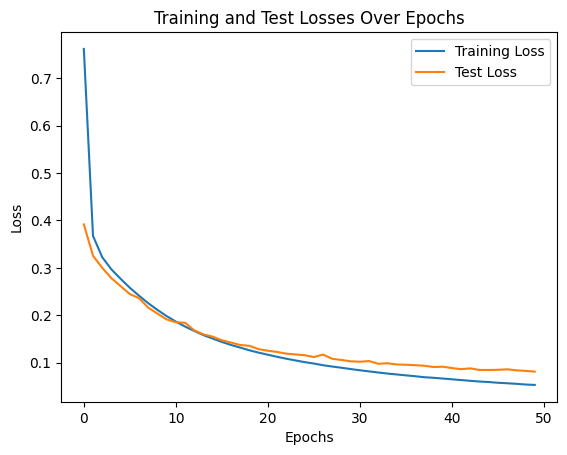

In [9]:
# TODO: plot the model complexity graph
import matplotlib.pyplot as plt
import numpy as np

# Plot the training and test losses
epoch_list = np.arange(num_epochs)
plt.plot(epoch_list, hist_training_loss, label='Training Loss')
plt.plot(epoch_list, hist_test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Losses Over Epochs')
plt.legend()
plt.show()


### TODO1: Comment the model complexity graph
### TODO2: Change the model and add more layer (use a complex model)

## Implementing Early Stopping 🛑

One of the key techniques in training neural networks effectively is 'Early Stopping'. This technique halts the training process if the model performance stops improving on a held-out validation set. Early stopping is a form of regularization used to avoid overfitting.

### Key Concepts:
- **Validation Loss**: Monitor the loss on a validation set to detect when it begins to increase, indicating overfitting.

In [10]:
# TODO: Complete this code to implement Early stopping
patience = 5
min_delta = 0.01
best_loss = None
patience_counter = 0

# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        # Training pass
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()  # computes gradients
        optimizer.step()  # adjust the weights
        running_loss += loss.item()

    # Calculate average training loss
    avg_train_loss = running_loss / len(train_loader)

    # Start evaluation phase
    model.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            batch_loss = criterion(outputs, labels)
            validation_loss += batch_loss.item()

    # Calculate average validation loss
    avg_validation_loss = validation_loss / len(test_loader)

    # Print training and validation loss
    print(f"Epoch {epoch+1}, Training Loss: {avg_train_loss}, Validation Loss: {avg_validation_loss}")

    # Check if the validation loss is improving
    if best_loss is None or avg_validation_loss < best_loss - min_delta:
        best_loss = avg_validation_loss
        patience_counter = 0  # Reset patience counter if validation loss improves
    else:
        patience_counter += 1  # Increment patience counter if no improvement
        if patience_counter >= patience:
            print("Early stopping triggered after epoch {}".format(epoch+1))
            break

print("Training is finished!")


Epoch 1, Training Loss: 0.05222758388311576, Validation Loss: 0.08430961612982758
Epoch 2, Training Loss: 0.05082977992067459, Validation Loss: 0.08171830942652597
Epoch 3, Training Loss: 0.049775299005039624, Validation Loss: 0.08097305489595755
Epoch 4, Training Loss: 0.04892576257906743, Validation Loss: 0.07853462921224155
Epoch 5, Training Loss: 0.04771886702660701, Validation Loss: 0.07922743697714499
Epoch 6, Training Loss: 0.04668087387052394, Validation Loss: 0.0789664313204551
Early stopping triggered after epoch 6
Training is finished!


In [ ]:
# TODO: Answer this questions
# What does min_delta and patience refer to ?
#min_delta refers to the minimum change in the monitored metric which loss to qualify an improvement.
#patience refers to the number of epochs with no improvement after which training will be stopped


# What is different from the first training ?
#when we compare from the first training the early stopping mechanism was triggered after the 6th epoch. This means the training was halted early because the validation loss did not improve significantly beyond min_delta.



## Experimenting with Dropout 🌧️

Dropout is a regularization technique that temporarily drops units (along with their connections) from the neural network during training. This prevents units from co-adapting too much and helps the model to generalize better to unseen data.

### Key Concepts:
- **Dropout Rate**: The probability of a neuron being dropped during training. Common rates are 0.2, 0.5, etc.
- **Generalization**: Dropout improves the generalization of the model on the test data.


In [11]:
import torch.nn.functional as F

class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()
        # Define layers of the neural network
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.2)  # Dropout layer with 20% probability
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)  # Dropout layer with 50% probability
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        # Forward pass with dropout
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Create an instance of the network with dropout
model_with_dropout = NetWithDropout()
print(model_with_dropout)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_with_dropout.parameters(), lr=0.01)

# Set the number of epochs
num_epochs = 50

# Training loop
for epoch in range(num_epochs):
    model_with_dropout.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()       # Clear gradients from the previous step
        outputs = model_with_dropout(images)
        loss = criterion(outputs, labels)     # Compute loss
        loss.backward()
        optimizer.step()            # Update the network weights

        running_loss += loss.item() # Add the loss for this batch

    # Print the average loss for the epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {running_loss/len(train_loader)}")

print("Training completed")


NetWithDropout(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Epoch 1/50, Training Loss: 1.333736461045137
Epoch 2/50, Training Loss: 0.6415284211828765
Epoch 3/50, Training Loss: 0.5107658432999145
Epoch 4/50, Training Loss: 0.44671155704554716
Epoch 5/50, Training Loss: 0.4017651455043984
Epoch 6/50, Training Loss: 0.36854070400410116
Epoch 7/50, Training Loss: 0.3412771712043392
Epoch 8/50, Training Loss: 0.31728402527569455
Epoch 9/50, Training Loss: 0.2973152441320135
Epoch 10/50, Training Loss: 0.2838821047182276
Epoch 11/50, Training Loss: 0.2666236607949617
Epoch 12/50, Training Loss: 0.25184062284145403
Epoch 13/50, Training Loss: 0.2416442569686787
Epoch 14/50, Training Loss: 0.23143316097239822
Epoch 15/50, Training Loss: 0.2227398355060549
Epoch 16/50

In [ ]:
# TODO: Train the dropout model
# What do you notice ?

# In this case we can notice that there is a decrease in the training loss over epochs and there is no early stopping triggered and we clearly see the there is an effectiveness of dropout preventing the overfitting by randomly dropping units.

## Submitting Your Project on GitHub 🚀

Submitting your project on GitHub not only allows you to showcase your work but also helps in version control and collaboration. Here's how you can do it:

### Step 1: Create a New Repository on GitHub
1. **Sign in to GitHub**: Go to [GitHub](https://github.com) and sign in with your account.
2. **Create a New Repository**: Click on the '+' icon in the top right corner and select 'New repository'.
3. **Name Your Repository**: Give your repository a meaningful name, like 'handwritten-digit-recognition'.
4. **Initialize with a README**: Check the box 'Initialize this repository with a README'.
5. **Create Repository**: Click the 'Create repository' button.

### Step 2: Clone the Repository to Your Local Machine
1. **Copy the Repository URL**: On your repository page on GitHub, click the 'Code' button and copy the URL.
2. **Clone in Terminal**: Open your terminal, navigate to where you want the repository, and run `git clone [URL]`, replacing `[URL]` with the URL you copied.

### Step 3: Add Your Project to the Repository
1. **Copy Your Notebook**: Place your Jupyter notebook file into the cloned repository folder on your local machine.
2. **Add the File**: Run `git add [filename]` in your terminal, replacing `[filename]` with the name of your notebook file.

### Step 4: Commit and Push Your Changes
1. **Commit Your Changes**: Run `git commit -m "Add project notebook"`.
2. **Push to GitHub**: Run `git push` to push your changes to the GitHub repository.

### Step 5: Create and Edit the README File
1. **Edit README.md**: On GitHub, open the README.md file and click the pencil icon to edit.
2. **Write Your README**: Include a project title, a brief description, installation instructions, and usage instructions. Optionally, add screenshots or additional sections as needed.
3. **Save Changes**: After editing, commit your changes by clicking 'Commit changes' at the bottom.

### 📌 TODOs for Submission:
- Ensure your Jupyter notebook is well-commented and formatted.
- Write a clear, concise README that effectively describes your project.
- Double-check that all files have been committed and pushed to your GitHub repository.

---

Remember, a well-documented GitHub repository not only reflects your technical skills but also your ability to communicate and present your work effectively. Happy coding and best of luck with your project submission! 🌟👩‍💻👨‍💻
